# Install and Import TextBlob

In [ ]:
#pip install textblob

In [ ]:
from textblob import TextBlob

# Analyze Individual Sentences

In [ ]:
# Sample a text

test = "The wireless speaker is amazing, but the battery life could be better."
blob = TextBlob(test)

# Extract sentiment

print(blob.sentiment)

Sentiment(polarity=0.55, subjectivity=0.7)


Observation: The phrase "amazing" contributes positively, while "could be better" adds some negativity, balancing the overall polarity.

# Batch Processing

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/amazon_reviews_data_clean.csv')

# Preview the dataset
df.head()

,review_id,product_id,product_name,brand,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,date,review length
0,r2lvx0omhfzx0l,b0d4sx9rc6,beats pill,beats by dre,5.0 out of 5 stars sounds great,hollywoody,5,i just sent back my jbl flip because it had di...,"reviewed in the united states january 9, 2025",ahcsv6wlxxa2exlwomlmb2fzbkeq,False,0,{},1/9/2025,23
1,r1vf3bhpt5c61n,b0d4sx9rc6,beats pill,beats by dre,5.0 out of 5 stars jbl,michael,5,they are a great value. the sound is awesome. ...,"reviewed in the united states january 8, 2025",ahuwzoal676robbd7srer6kyjbka,False,0,{},1/8/2025,11
2,r2yfcrsc298ts7,b0d4sx9rc6,beats pill,beats by dre,5.0 out of 5 stars i love it!,william g.,5,"the sound quality is amazing, it’s easy to pai...","reviewed in the united states january 8, 2025",agy6hyebnuxqxea7gpozyzrry3fq,False,0,{},1/8/2025,14
3,r1dkvihxe9rzus,b0d4sx9rc6,beats pill,beats by dre,2.0 out of 5 stars must me rejects from a real...,lady b,2,this speaker must have come from failed qualit...,"reviewed in the united states january 8, 2025",ah3zdvkgdobn2oi6ch5wlvmn3jma,False,0,{},1/8/2025,66
4,rlruivaagz3en,b0d4sx9rc6,beats pill,beats by dre,5.0 out of 5 stars a gift for my dad,jacky k.,5,sound quality is good. it can get pretty loud ...,"reviewed in the united states january 8, 2025",afyjoku2nxnz5qcvtjcrgjbfuiva,False,0,{},1/8/2025,26


# Apply Sentiment Analysis

In [ ]:
# Create new columns for polarity and subjectivity

df['polarity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Preview the updated dataset

df.head()

,review_id,product_id,product_name,brand,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,date,review length,polarity,subjectivity
0,r2lvx0omhfzx0l,b0d4sx9rc6,beats pill,beats by dre,5.0 out of 5 stars sounds great,hollywoody,5,i just sent back my jbl flip because it had di...,"reviewed in the united states january 9, 2025",ahcsv6wlxxa2exlwomlmb2fzbkeq,False,0,{},1/9/2025,23,0.325000,0.343750
1,r1vf3bhpt5c61n,b0d4sx9rc6,beats pill,beats by dre,5.0 out of 5 stars jbl,michael,5,they are a great value. the sound is awesome. ...,"reviewed in the united states january 8, 2025",ahuwzoal676robbd7srer6kyjbka,False,0,{},1/8/2025,11,0.675000,0.662500
2,r2yfcrsc298ts7,b0d4sx9rc6,beats pill,beats by dre,5.0 out of 5 stars i love it!,william g.,5,"the sound quality is amazing, it’s easy to pai...","reviewed in the united states january 8, 2025",agy6hyebnuxqxea7gpozyzrry3fq,False,0,{},1/8/2025,14,0.511667,0.646667
3,r1dkvihxe9rzus,b0d4sx9rc6,beats pill,beats by dre,2.0 out of 5 stars must me rejects from a real...,lady b,2,this speaker must have come from failed qualit...,"reviewed in the united states january 8, 2025",ah3zdvkgdobn2oi6ch5wlvmn3jma,False,0,{},1/8/2025,66,-0.066667,0.286667
4,rlruivaagz3en,b0d4sx9rc6,beats pill,beats by dre,5.0 out of 5 stars a gift for my dad,jacky k.,5,sound quality is good. it can get pretty loud ...,"reviewed in the united states january 8, 2025",afyjoku2nxnz5qcvtjcrgjbfuiva,False,0,{},1/8/2025,26,0.421429,0.642857


New Columns:
- **Polarity**: indicates whether the reviews is positive, negative or neutral. Polarity score ranges from -1 (negative) to 1 (positive). A higher positive score indicates a more positive sentiment
- **Subjectivity**: Shows how opinioniated the review is. Subjectivity score ranges from 0 (objective) to 1 (subjective). It shows how much of the text is subjective or based on personal opinion

# Visualize Sentiment Scores

## Histogram of Polarity

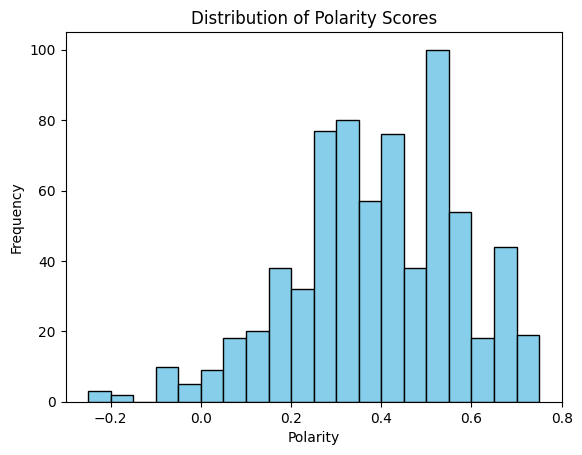

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of polarity
plt.hist(df['polarity'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Polarity Scores")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

**Insights**:
- Histogram mostly shows polarity distribution skewing left, or skewing towards positive.
- Shows that reviews mostly lean towards positive sentiments.

## Scatter Plot of Polarity vs Subjectivity

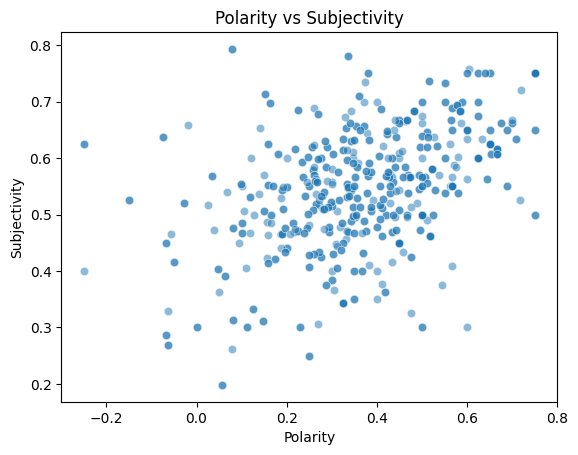

In [ ]:
import seaborn as sns

# Scatter plot
sns.scatterplot(x='polarity', y='subjectivity', data=df, alpha=0.5)
plt.title('Polarity vs Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

**Insights:**
- Most points are clustered towards the center, inching towards the upper right quadrant.
- This indicates that most customers often express opinions that are mostly positive in sentiments, and balanced Subjectivity, since most fall somewhere in the middle of the range.

## Categorize Reviews

In [ ]:
# Create function to categorize sentiments

def categorize_sentiment(polarity):
  if polarity > 0.2:
    return 'Positive'
  elif polarity < -0.2:
    return 'Negative'
  else:
    return 'Neutral'


# Apply categorization

df['sentiment'] = df['polarity'].apply(categorize_sentiment)


# Count the number of each sentiment

df['sentiment'].value_counts()

,count
sentiment,
Positive,593
Neutral,104
Negative,3


## Visualize Sentiment Distribution

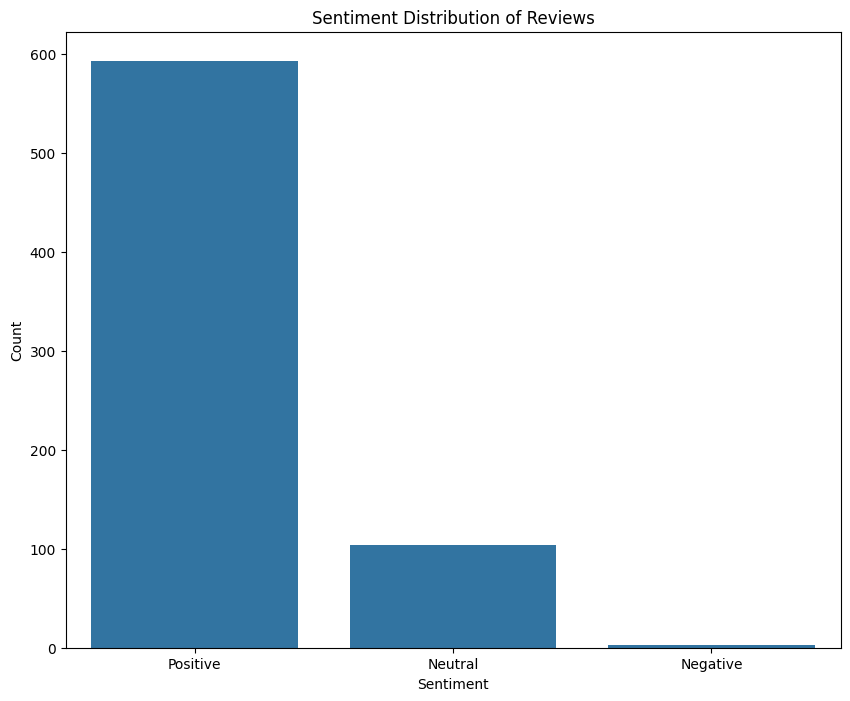

In [ ]:
plt.figure(figsize=(10,8))


sns.barplot(df['sentiment'].value_counts())
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

**Insights**
- ~84.7% of reviews are positive
- ~14.9% are neutral
- ~0.004% are negative
- sentiment distribution shows a very low proportion of negative reviews, which is great.

# Extract Key Insights

##Word Cloud for Positive Reviews

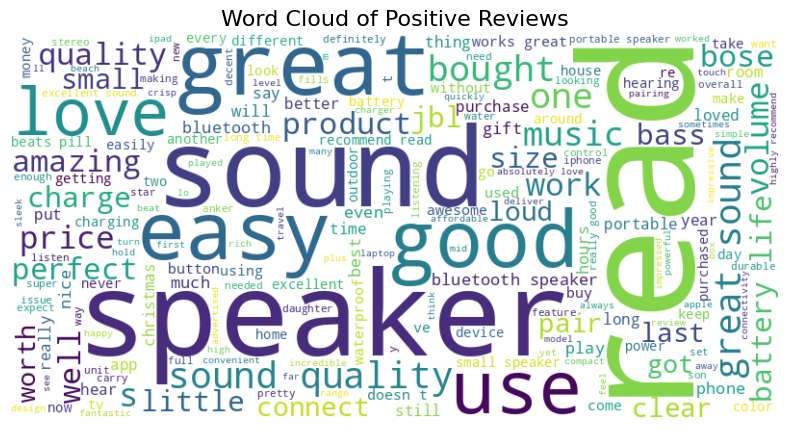

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for positive reviews
positive_reviews = " ".join(df[df['sentiment'] == 'Positive']['content'])
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(positive_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Positive Reviews", fontsize=16)
plt.show()

##Word Cloud for Negative Reviews

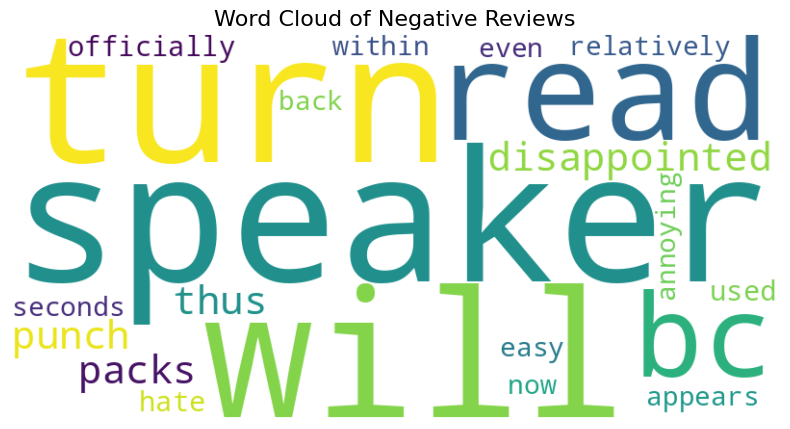

In [ ]:
# Generate word cloud for negative reviews
positive_reviews = " ".join(df[df['sentiment'] == 'Negative']['content'])
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(positive_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Negative Reviews", fontsize=16)
plt.show()

## Word Cloud for Neutral Reviews

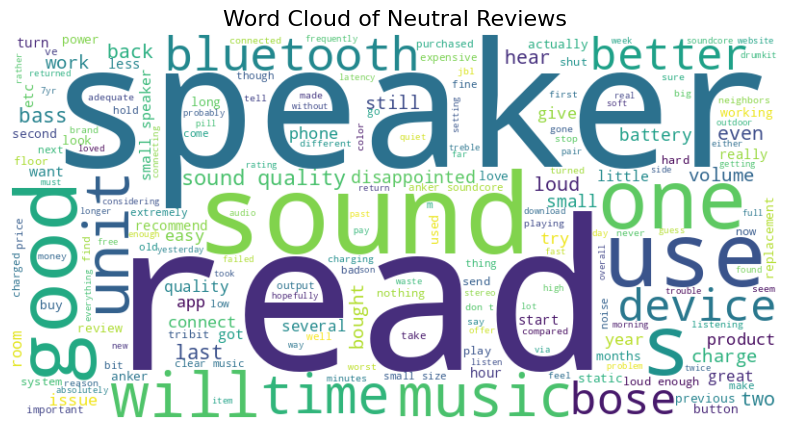

In [ ]:
# Generate word cloud for neutral reviews
positive_reviews = " ".join(df[df['sentiment'] == 'Neutral']['content'])
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(positive_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Neutral Reviews", fontsize=16)
plt.show()

In [ ]:
# Save updated dataset

#df.to_csv('amazon_reviews_data_clean_with_sentiment.csv', index=False)